# Overview of how my time is spent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gspread

Import csv file from Google sheets and drop rows before today

In [71]:
trackData = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTzosEj_RfJEZgoC6h7AinJc0znDN5eIRzg9bADDJs9jS8Z84WLLhmjG_TPTozRjpX_M_nzEIfEnyfL/pub?gid=1401161070&single=true&output=csv",index_col=0)

In [72]:
trackData = trackData[trackData['dayBegin'].notna()]

In [74]:
trackData.head(7)

,day,dayBegin,dayEnd,hoursLived,sustainHours,armyHours,workHours,chillHours,workoutHours,otherHours,...,weightDifference,happinessScore,mo,chillType,chillHoursByType,bookTitleTwo,pagesReadTwo,prevPageTwo,currPageTwo,pageReadTotal
2020.10.12,1.0,6.5,22.75,16.25,3.0,4.5,2.50,3.0,1.00,1.0,...,0.1,6.0,0.0,"skype,chat","0.5,1",a little life,9.0,624.0,633.0,19
2020.10.13,2.0,6.5,22.75,16.25,3.5,5.0,4.25,2.0,1.50,NaN,...,0.7,6.5,0.0,"hangout,survivo","1.5,0.5",a little life,12.0,633.0,645.0,24
2020.10.14,3.0,6.5,23.00,16.50,3.5,5.0,1.00,4.0,2.00,0.5,...,-0.5,7.5,1.5,"Youtube,survivo","2,1.5",a little life,0.0,645.0,645.0,18
2020.10.15,4.0,6.5,22.50,16.00,3.5,5.0,4.25,1.0,1.25,0.5,...,0.7,7.5,1.0,"guitar,youtube,survivo","0.5,0.25,0.25",a little life,17.0,645.0,662.0,22
2020.10.16,5.0,6.5,23.00,16.50,3.5,7.0,2.00,2.0,1.50,0.0,...,-0.9,7.0,0.0,"Youtube,survivo","1,1",a little life,0.0,662.0,662.0,0
2020.10.17,6.0,7.0,23.00,16.00,3.5,0.5,3.50,6.0,1.50,0.0,...,0.2,7.5,1.0,"guitar,youtube,survivo,nap,zoom","0.5,0.5,1,2,2",a little life,0.0,662.0,662.0,0
2020.10.18,7.0,7.0,22.75,15.75,3.5,7.5,2.50,3.0,0.00,NaN,...,0.5,7.0,0.0,"barbeque,survivo","2.5,0.5",a little life,26.0,662.0,688.0,35


In [5]:
trackData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 2020.10.12 to 2020.11.23
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayBegin          43 non-null     float64
 1   dayEnd            43 non-null     float64
 2   hoursLived        43 non-null     float64
 3   sustainHours      43 non-null     float64
 4   armyHours         43 non-null     float64
 5   workHours         43 non-null     float64
 6   chillHours        43 non-null     float64
 7   workoutHours      42 non-null     float64
 8   otherHours        10 non-null     float64
 9   unknownHours      43 non-null     float64
 10  assumption        32 non-null     object 
 11  codingHours       43 non-null     float64
 12  typeOfCoding      38 non-null     object 
 13  bookTitleOne      43 non-null     object 
 14  pagesReadOne      41 non-null     float64
 15  prevPageOne       42 non-null     float64
 16  currPageOne       22 non-null     

### Nutshell view history

In [21]:
avgHoursLived = trackData['hoursLived'].mean()
avgHoursArmy = trackData['armyHours'].mean()
avgHoursWorking = trackData['workHours'].mean()
avgEfficiencyScore = trackData['efficiencyScore'].mean()
avgHappinessScore = trackData['happinessScore'].mean()
avgPagesRead = trackData['pageReadTotal'].sum()
countWorkout = trackData.loc[trackData.workout == True, 'workout'].count()
countMeditation = trackData.loc[trackData.meditation == True, 'meditation'].count()

In [22]:
print("Recent",len(trackData.index),'days in a nutshell:')
print('Average number of hours lived in a day:',avgHoursLived)
print('Average number of hours spent for army:',avgHoursArmy)
print('Average number of hours spent for work:',avgHoursWorking)
print('Average efficiency score is:',avgEfficiencyScore)
print('Average happiness score is:',avgHappinessScore)
print('Number of workouts:', countWorkout)
print('Number of meditations:',countMeditation)

Recent 43 days in a nutshell:
Average number of hours lived in a day: 15.924418604651162
Average number of hours spent for army: 4.9186046511627906
Average number of hours spent for work: 3.36046511627907
Average efficiency score is: 6.6976744186046515
Average happiness score is: 7.151162790697675
Number of workouts: 27
Number of meditations: 20


### Nutshell view recent week

In [27]:
trackDataRecent = trackData.tail(7)

In [28]:
avgHoursLivedRecent = trackDataRecent['hoursLived'].mean()
avgHoursArmyRecent = trackDataRecent['armyHours'].mean()
avgHoursWorkingRecent = trackDataRecent['workHours'].mean()
avgEfficiencyScoreRecent = trackDataRecent['efficiencyScore'].mean()
avgHappinessScoreRecent = trackDataRecent['happinessScore'].mean()
avgPagesReadRecent = trackDataRecent['pageReadTotal'].sum()
countWorkoutRecent = trackDataRecent.loc[trackData.workout == True, 'workout'].count()
countMeditationRecent = trackDataRecent.loc[trackData.meditation == True, 'meditation'].count()

In [30]:
print("Recent week in a nutshell:")
print('Average number of hours lived in a day:',avgHoursLivedRecent)
print('Average number of hours spent for army:',avgHoursArmyRecent)
print('Average number of hours spent for work:',avgHoursWorkingRecent)
print('Average efficiency score is:',avgEfficiencyScoreRecent)
print('Average happiness score is:',avgHappinessScoreRecent)
print('Number of workouts:', countWorkoutRecent)
print('Number of meditations:',countMeditationRecent)

Recent week in a nutshell:
Average number of hours lived in a day: 15.5
Average number of hours spent for army: 4.357142857142857
Average number of hours spent for work: 3.9285714285714284
Average efficiency score is: 6.785714285714286
Average happiness score is: 7.428571428571429
Number of workouts: 3
Number of meditations: 2


### Nuthsell visualizations

In [37]:
sns.set_style('darkgrid')

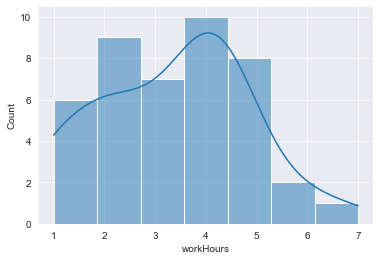

In [65]:
sns.histplot(trackData['workHours'],kde=True)

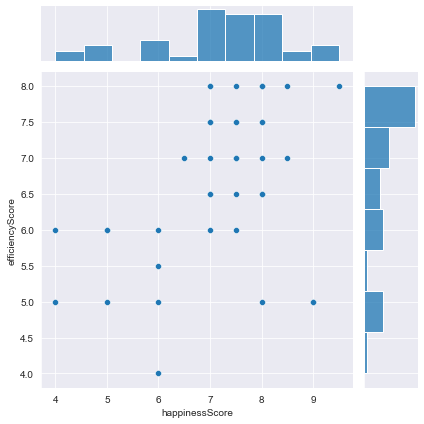

In [38]:
sns.jointplot(x='happinessScore',y='efficiencyScore',data=trackData,kind='scatter')

As we can seee in the above visualizations, it is not a good way to visualize since a lot of these recorded datas are estimates in the units of 0.5 or 0.25.
One brute force way to resolve this issue could be actually recording more precise data. But that would take too much time in real life. An alternate approach that I take is seeing the percentage of hours a certain category takes from the number of hours lived.
For example, if the number of hours lived is 16 hours and work hours is 4, it would result in 4/16 = 0.25
This would resolve the original issue and give a more realistic visualization of how much time was spent in that category.

In [78]:
trackData['armyHoursPercentage'] = trackData['armyHours']/trackData['hoursLived']
trackData['workHoursPercentage'] = trackData['workHours']/trackData['hoursLived']
trackData['chillHoursPercentage'] = trackData['chillHours']/trackData['hoursLived']

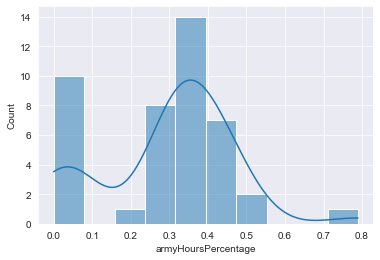

In [52]:
sns.histplot(trackData['armyHoursPercentage'],bins=10,kde=True)

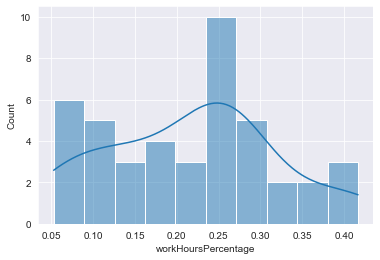

In [53]:
sns.histplot(trackData['workHoursPercentage'],bins=10,kde=True)

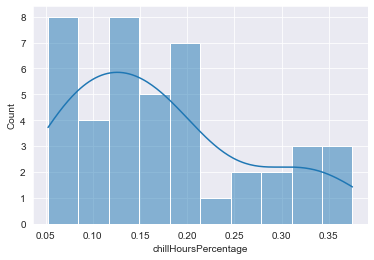

In [54]:
sns.histplot(trackData['chillHoursPercentage'],bins=10,kde=True)

Making the new percentage column 

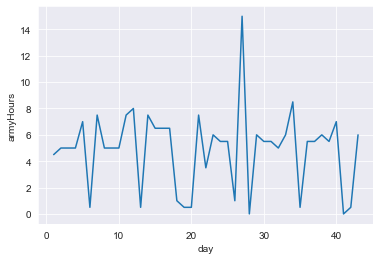

In [95]:
sns.lineplot(data=trackData, x="day", y="armyHours")

Takeaway: This simple lineplot does offer some insight.
1. The super high peek is when I have night shift duties.
2. The days where number of hours fall before 3 are days off.

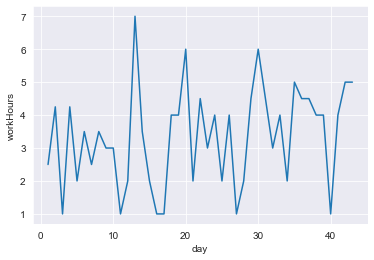

In [96]:
sns.lineplot(data=trackData, x="day", y="workHours")

Takeaway:
1. The days that have more than 5 days of work hours is weekends.
2. It is still a mystery of the plummeting work hours on some days. It could be due to certain events or simple burnouts. Events are not added in the data but could be derived from chill type column. In the other case of a burnout, the average number of chill hours for n number of days before the drop could be a cue.

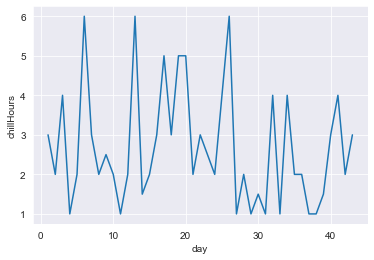

In [97]:
sns.lineplot(data=trackData, x="day", y="chillHours")

Takeaway:
    This one was easier to digest. The skyrocketing number of hours that are above 5 are all on Friday or weekends. :)

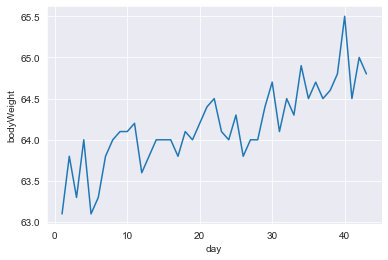

In [85]:
sns.lineplot(data=trackData, x="day", y="bodyWeight")

Takeaway: Bodyweight is increasing generally

In [81]:
# plt.scatter(trackData['armyHoursPercentage'], trackData['workHoursPercentage'])

### Does meditation and workouts matter?

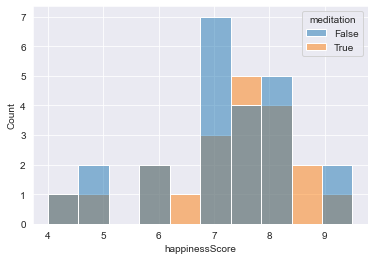

In [99]:
sns.histplot(data=trackData, x="happinessScore", hue="meditation")

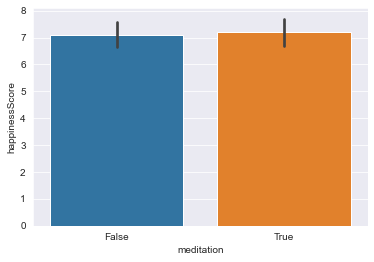

In [101]:
sns.barplot(x='meditation',y='happinessScore',data=trackData)

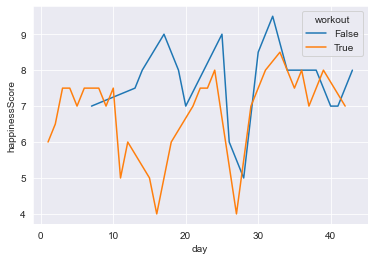

In [91]:
sns.lineplot(data=trackData, x="day", y="happinessScore",hue='workout')

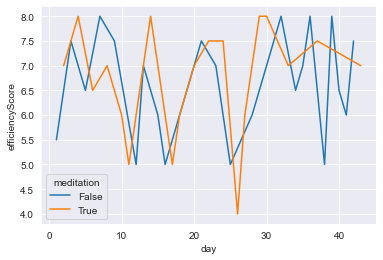

In [92]:
sns.lineplot(data=trackData, x="day", y="efficiencyScore",hue='meditation')

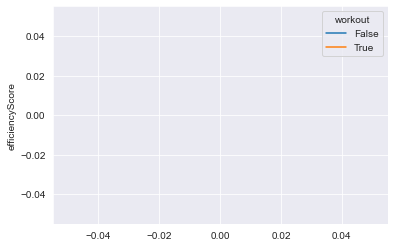

In [94]:
sns.lineplot(data=trackData, x="day", y="efficiencyScore",hue='workout')

### Correlation between variables

In [67]:
trackData[['efficiencyScore','happinessScore']].corr()

,efficiencyScore,happinessScore
efficiencyScore,1.000000,0.427811
happinessScore,0.427811,1.000000


The correlation matrix between these two variables show that there is low correlation between them.

In [68]:
trackData[['efficiencyScore','workHours']].corr()

,efficiencyScore,workHours
efficiencyScore,1.000000,0.444299
workHours,0.444299,1.000000


In [69]:
trackData[['happinessScore','chillHours']].corr()

,happinessScore,chillHours
happinessScore,1.000000,0.165266
chillHours,0.165266,1.000000


In [70]:
trackData['chillType'].str.contains('skype').mean()

0.09302325581395349

###### This is an interesting find... Looks like more chilling does not lead to more happiness.

In [15]:
trackData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2020.10.12 to 2020.11.15
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dayBegin          35 non-null     float64
 1   dayEnd            35 non-null     float64
 2   hoursLived        35 non-null     float64
 3   sustainHours      35 non-null     float64
 4   armyHours         35 non-null     float64
 5   workHours         35 non-null     float64
 6   chillHours        35 non-null     float64
 7   workoutHours      34 non-null     float64
 8   otherHours        10 non-null     float64
 9   unknownHours      35 non-null     float64
 10  assumption        28 non-null     object 
 11  codingHours       35 non-null     float64
 12  typeOfCoding      30 non-null     object 
 13  bookTitleOne      35 non-null     object 
 14  pagesReadOne      35 non-null     float64
 15  prevPageOne       35 non-null     float64
 16  currPageOne       15 non-null     